<a href="https://colab.research.google.com/github/qahaidari/fft-in-python-for-radar-applications/blob/main/how_to_do_fft_in_python_for_radar_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast Fourier Transform (FFT) in Python for radar applications

In this notebook, I am going to simulate a simple radar scenario in Python and use FFT to extract the most significant frequencies as well as phases of a simulated signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.fftpack import fft

We first define a continous signal in time domain and considering the Nyquist theorem, sample it. Hence, we define the below constants, 
*   $N$: number of samples. According to [DFT](https://www.robots.ox.ac.uk/~sjrob/Teaching/SP/l7.pdf), it is better to define $N$ as a power of 2 for FFT efficiency.
*   $f_s$: sampling frequency in samples/second

and set them to below values as in the example of [DFT](https://www.robots.ox.ac.uk/~sjrob/Teaching/SP/l7.pdf).


In [3]:
N = 4
f_s = 4 # selected based on Nyquist theorem

The sampled data are separated from each other by sample time $T_s$:

In [4]:
T_s = 1/f_s
print(T_s, "seconds")

0.25 seconds


Based on the sampling data above, a time vector is generated with $N$ sampling points.

In [5]:
t = np.linspace(0, T_s*N, N)

The example signal in [DFT](https://www.robots.ox.ac.uk/~sjrob/Teaching/SP/l7.pdf) is sampled and FFT is applied on the sampled data to extract the frequency components. In a typical radar scenario, the received signal, reflected from possible targets, is mixed with the original transmitted signal and then low pass filtered. This intermediate signal is then sampled using an ADC and the samples are used for the next signal processing steps to extract the frequency components (and later calculate the target range and velocity based on the modulation format which has been used). Imagine that below signal is the intermediate signal in a radar scenario.

\begin{align}
f(t) = 5 + 2 \text{cos}(2\pi t - 90^\circ) + 3 \text{cos}(4\pi t)
\end{align}


In [6]:
f_t = 5 + 2*np.cos(2*np.pi*t - np.pi/2) + 3*np.cos(4*np.pi*t)

**FFT**

In [7]:
fft_f = fft(f_t)

FFT returns complex values:

In [21]:
fft_f.dtype

dtype('complex128')

FFT returns a symmetric shape with positive frequencies on the left side and negative on the right. Also note that the translation between frequency indices and the actual frequency points is as follows:
\begin{align}
f_k = k \frac{f_s}{N}
\end{align}

, with $k$ and $f_k$ representing frequency indices and actual frequency points respectively. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


FFT results: [23.        -0.j          6.23205081+2.76794919j -3.46410162-0.j
  6.23205081-2.76794919j]


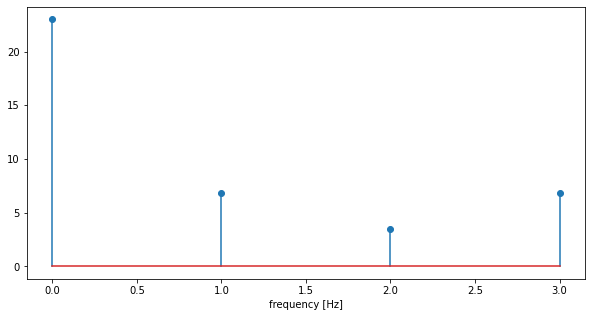

In [8]:
plt.figure(figsize=(10,5))
f_k = np.arange(0,N) * f_s / N
plt.stem(f_k, np.abs(fft_f)) # we take abs in order to get the magnitude of a complex number
plt.xlabel("frequency [Hz]")
print("FFT results:", fft_f)

The results look different from the example in [DFT](https://www.robots.ox.ac.uk/~sjrob/Teaching/SP/l7.pdf). The problem is with linspace command. Sample points should be evenly distributed to give results as in [DFT](https://www.robots.ox.ac.uk/~sjrob/Teaching/SP/l7.pdf). So we cannot use `np.linspace(0, T_s*N, N)`. Instead we should use:

`t, dt = np.linspace(0, T_s*N, N, endpoint=False, retstep=True)`

For more information about `linspace` command, refer to [Numpy.linspace documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html?highlight=linspace#numpy.linspace).

FFT results: [20.-0.j  0.-4.j 12.-0.j  0.+4.j]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


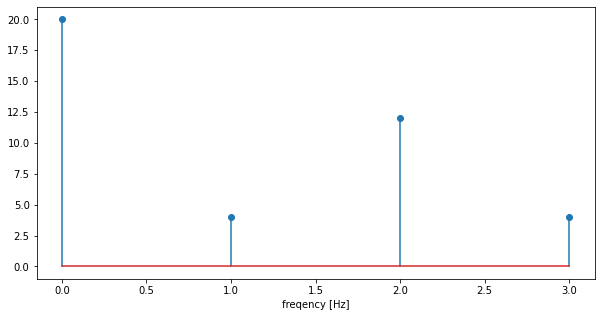

In [9]:
t, dt = np.linspace(0, T_s*N, N, endpoint=False, retstep=True)
f_t = 5 + 2*np.cos(2*np.pi*t - np.pi/2) + 3*np.cos(4*np.pi*t)
fft_f = fft(f_t)
f_k = np.arange(0,N) * f_s / N
plt.figure(figsize=(10,5))
plt.stem(f_k, np.abs(fft_f)) # we take abs in order to get the magnitude of a complex number
plt.xlabel("freqency [Hz]")
print("FFT results:", fft_f)

Now the results are the same. Let's increase the number of samples and sampling frequency now.

In [44]:
N = 2048
f_s = 1000
T_s = 1/f_s
t, dt = np.linspace(0, T_s*N, N, endpoint=False, retstep=True)
f_t = 5 + 2*np.cos(2*np.pi*t - np.pi/2) + 3*np.cos(4*np.pi*t)
fft_f = fft(f_t)

Text(0.5, 1.0, 'Visualizing samples')

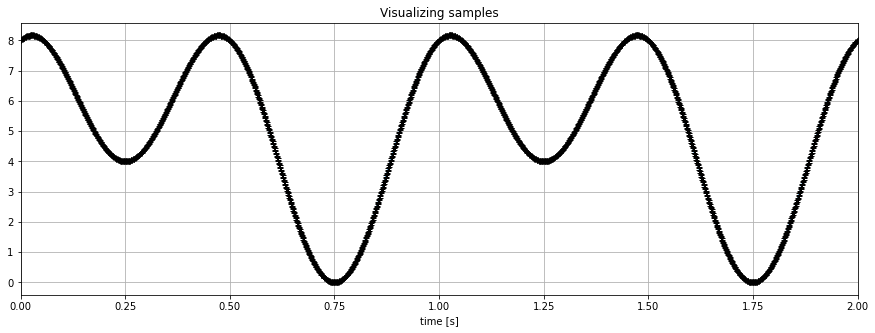

In [45]:
# visualization of signal
plt.figure(figsize=(15,5))
plt.plot(t, f_t)
plt.plot(t, f_t, "k+")
plt.xlabel("time [s]")
plt.xlim([0, 2])
plt.grid()
plt.title("Visualizing samples")

FFT results: [10389.75837772   -0.j           162.83970148  -49.68355298j
   487.91891538-1966.16541654j ...   279.57001928 -187.44513753j
   487.91891538+1966.16541654j   162.83970148  +49.68355298j]


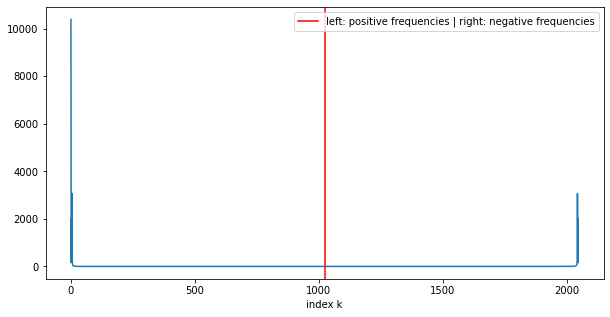

In [46]:
# visualization of amplitude spectrum
plt.figure(figsize=(10,5))
plt.plot(np.abs(fft_f)) # we take absolute values in order to get the magnitude of a complex number
plt.axvline(N//2, color="red", label="left: positive frequencies | right: negative frequencies")
plt.xlabel("index k")
plt.legend();
print("FFT results:", fft_f)

The index $k$ represents a frequency component. Because we are interested in positive frequencies for now, we cut the returned array in half. If $N$ is even, positive frequencies (starting from $k = 0$) exist up to $k = N/2$. But the last point includes effects of both positive and negative frequencies. In the following, points from $0$ up to $(N/2) - 1$ is taken into account; refer to [Numpy FFT documentation](https://numpy.org/doc/stable/reference/routines.fft.html#module-numpy.fft).

In [47]:
fft_f_positive = fft_f[:N//2]

In [48]:
fft_f_positive.shape

(1024,)

Each element in `fft_f` is a complex value hence representing a real and an imaginary part. Using these real and imaginary parts, we can find amplitude $A_k$ and phase $\phi_k$ for each specific frequency point $f_k$ with $k$ the frequency index.

The relationship between $f_k$, $f_s$, $k$ and $N$ is as follows:
\begin{align}
f_k = f_s \frac{k}{N}
\end{align}

for example, if there is a cosine component in our signal with a frequency of $2 Hz$, its magnitude peak should appear at position $k = N \frac{f_k}{f_s} = 2048 \frac{2}{1000} = 4.096 \approx 4$.

In our example signal:
- $2 cos(2\pi t - 90°)$: a peak happens at $k=2.048 \approx 2$
- $3 cos(4\pi t)$: a greater peak (because of the amplitude 3) happens at $k= 4.096 \approx 4$
- the greatest peak (because of the amplitude 5) happens at $k = 0$. This is the dc frequency point.

Text(0.5, 1.0, 'Amplitude spectrum')

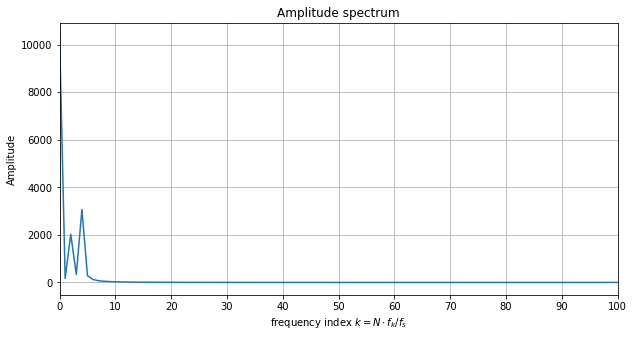

In [49]:
plt.figure(figsize=(10,5))
plt.plot(np.abs(fft_f_positive))
plt.xlim([0, 100])
plt.xticks(range(0, 101, 10))
plt.grid()
plt.xlabel("frequency index $k = N \cdot f_k/f_s$")
plt.ylabel("Amplitude")
plt.title("Amplitude spectrum")

From the amplitude spectrum, by knowing the positions where a peak happens we can find the corresponding frequency using the below translation:

\begin{align}
f_k =& f_s\frac{k}{N}
\end{align}

In [50]:
# constructing the frequency vector (only for the positive frequencies)
f_k = np.arange(0, N//2)*f_s/N

(0.0, 10.0)

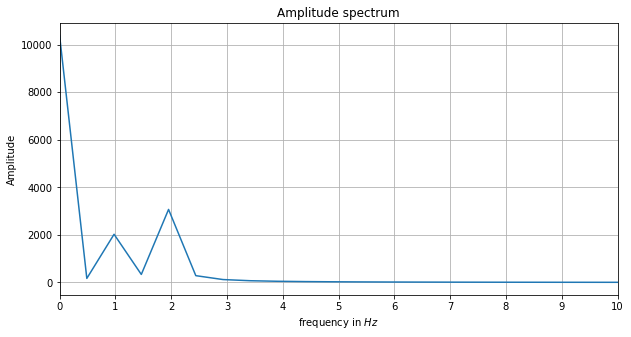

In [51]:
plt.figure(figsize=(10,5))
plt.plot(f_k, np.abs(fft_f_positive))
plt.grid()
plt.xlabel("frequency in $Hz$")
plt.ylabel("Amplitude")
plt.title("Amplitude spectrum")
plt.xticks(range(0, f_s//2, 1))
plt.xlim([0, 10])

So the peaks happen at DC, $1 \text{Hz}$ and $2 \text{Hz}$. We normalize the magnitude of the peaks by the factor of $\frac{2}{N}$, except the DC component which is scaled by $\frac{1}{N}$:

Text(2, 3.02, '$3 cos(4\\pi t)$')

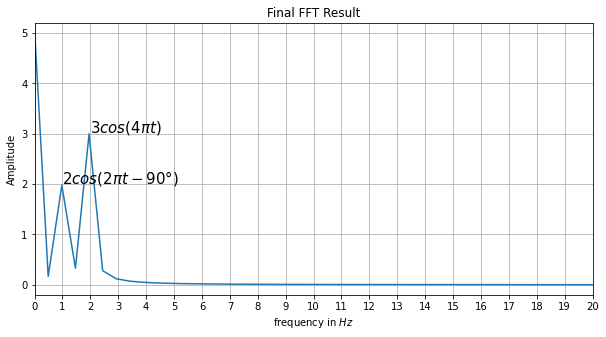

In [52]:
plt.figure(figsize=(10,5))
myabs = np.abs(fft_f_positive)
myabs[0] = (1/N)*myabs[0]
myabs[1:] = (2/N)*myabs[1:]
plt.plot(f_k, myabs)
plt.grid()
plt.xlabel("frequency in $Hz$")
plt.ylabel("Amplitude")
plt.title("Final FFT Result")
plt.xticks(range(0, f_s//2, 1))
plt.xlim([0, 20])
plt.ylim([-0.2, 5.2])
plt.text(1, 2.02, "$2 cos(2\pi t - 90°)$", fontdict={"size": 15})
plt.text(2, 3.02, "$3 cos(4\pi t)$", fontdict={"size": 15})

**Phase**

We could find the magnitudes and the frequencies of both cosine signals but not the $90^\circ$ phase of the slower $1Hz$ signal. The FFT result is a complex array. Let's plot the real and imaginary parts of each frequency point.

(0.0, 10.0)

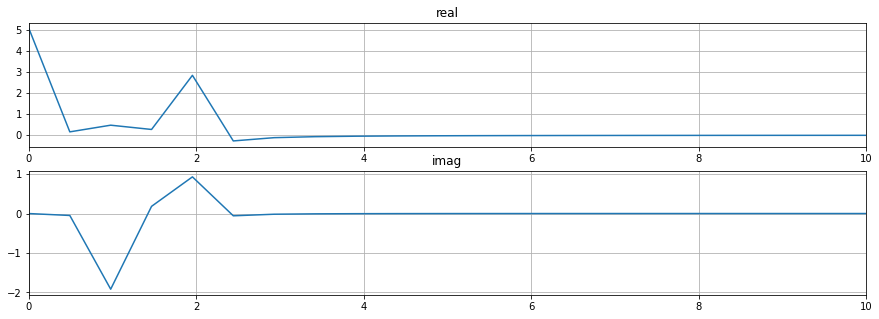

In [53]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
myreal = np.real(fft_f_positive)
myreal[0] = (1/N)*myreal[0]
myreal[1:] = (2/N)*myreal[1:]
plt.title("real")
plt.plot(f_k, myreal)
plt.grid()
plt.xlim([0, 10])
plt.subplot(2, 1, 2)
plt.title("imag")
plt.plot(f_k, 2/N*np.imag(fft_f_positive))
plt.grid()
plt.xlim([0, 10])

Accordign to [Interpret FFT results – obtaining magnitude and phase information](https://www.gaussianwaves.com/2015/11/interpreting-fft-results-obtaining-magnitude-and-phase-information/), the angle of a complex number is calculated as the proportion of its imaginary and real parts:

\begin{align}
\alpha = \text{arctan} \frac{\text{imag}}{\text{real}}
\end{align}

In Python, the function `np.angle` does this for us. We can also use the below line to do it manually:

`angle = np.arctan2(2/N*np.imag(fft_f_positive),(2/N*np.real(fft_f_positive)))*180 / np.pi`

This gives us the angles in degree.

In [54]:
angle = np.angle(fft_f_positive, deg=True)

now plot it again

(-150.0, 150.0)

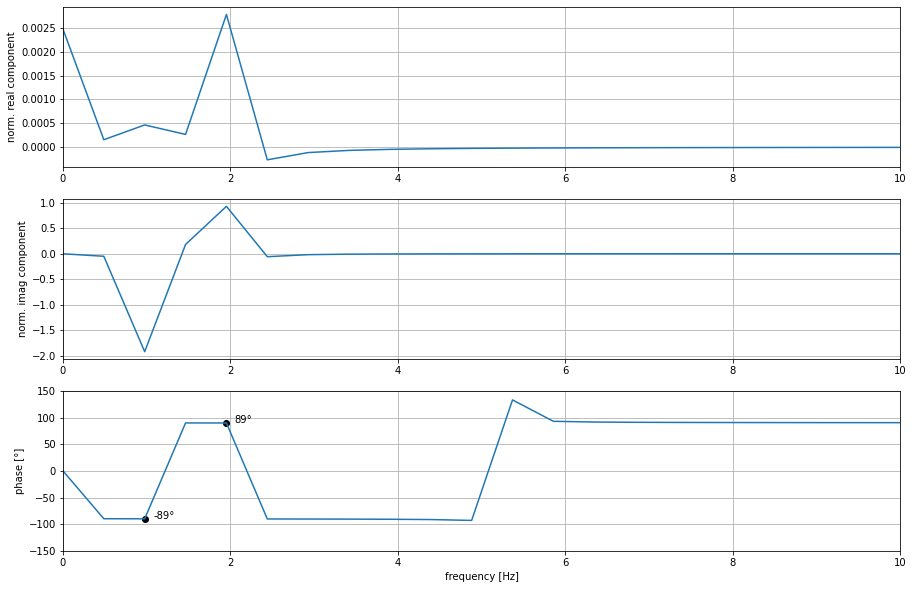

In [55]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.ylabel("norm. real component")
myreal = np.real(fft_f_positive)
myreal[0] = (1/N)*myreal[0]
myreal[1:] = (2/N)*myreal[1:]
plt.plot(f_k, myreal)
plt.grid()
plt.xlim([0, 10])
plt.subplot(3, 1, 2)
plt.ylabel("norm. imag component")
plt.plot(f_k, 2/N*np.imag(fft_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(3, 1, 3)
plt.plot(f_k, angle)
plt.grid()
plt.ylabel("phase [°]")
plt.xlabel("frequency [Hz]")
plt.xlim([0, 10])

plt.scatter(f_k[[2, 4]], angle[[2, 4]], color="k")
plt.text(f_k[2] + 0.1 , angle[2], "%d°" % int(angle[2]))
plt.text(f_k[4] + 0.1 , angle[4], "%d°" % int(angle[4]))
plt.ylim([-150, 150])

Let's make the phase shift of the $1 \text{Hz}$ cosine signal time dependent.
\begin{align}
f(t) = 2 \text{cos}(2\pi t - 90^\circ t) = 2 \text{cos}(2\pi t - \frac{\pi}{2} t) \\
\phi = \phi(t) = -\frac{\pi}{2}t = vt
\end{align}

This is typical in radar applications where we use for example chirp sequence modulation. In a chirp sequence radar, multiple ramps are transmitted which over time experience different phase shifts. By applying an FFT on one ramp, target range can be extracted. And by applying a second FFT over multiple ramps, the target velocity can be extracted. 

Therefore, in this section we want to apply FFT on different cycle periods of a signal with a time dependent phase shift and find the frequencies with max magnitude from each of these cycle periods. Then we apply a second FFT over these frequencies to find the angle velocity parameter $v$.

In [85]:
def f_t(t, phi):
    return 2*np.cos(2*np.pi*t + phi)

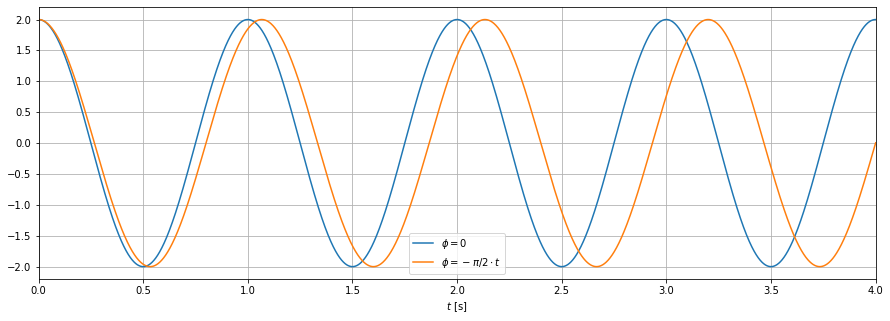

In [86]:
t = np.linspace(0, 10, 10000)
plt.figure(figsize=(15,5))
plt.plot(t, f_t(t, 0), label="$\phi=0$")
plt.plot(t, f_t(t, -np.pi/2*t), label="$\phi=-\pi/2 \cdot t$")
plt.xlim([0, 4])
plt.xlabel("$t$ [s]")
plt.grid()
plt.legend();

Since the phase shift changes over time, I want to do the FFT for multiple $T_{\text{cycle}}$ seconds in the signal; apply the FFT on each $T_{\text{cycle}}$ and then save the FFT results in a list.

In [87]:
T_cycle = 2 # seconds
n_cycles = 200

For each $T_{\text{cycle}}$, I choose the following sampling configuration.

In [88]:
f_s = 1000
T_s = 1/f_s
N = int(T_cycle/T_s)
print("Sample frequency:", f_s, "Hz")
print("Sample period:", T_s, "sec")
print("Number samples:", N)

Sample frequency: 1000 Hz
Sample period: 0.001 sec
Number samples: 2000


Run FFT on each cycle and save the results in a list.

In [89]:
fft_cycles = list() # result list

# for each cycle
for c in range(n_cycles):
    
    # start and end of a cycle
    t_start = c*T_cycle
    t_end = (c+1)*T_cycle
    
    # sample the signal at according time points
    t_sample = np.arange(t_start, t_end, T_s)
    f_sample = f_t(t_sample, -np.pi/2*t_sample)
    
    # run FFT and append results
    fft_res = fft(f_sample)
    fft_cycles.append(fft_res)

Extract the positive frequencies and normalize the amplitudes.

In [90]:
fft_cycles = [2/N*r[:N//2] for r in fft_cycles]

In [91]:
len(fft_cycles[0])

1000

In [92]:
# frequency vector after translating frequency indices
f_k = np.arange(0, N//2)*f_s/N

In [ ]:
f_k

Let's see if the time dependent phase shift introduced by $\phi(t) = -\frac{\pi}{2} t$ is visible in the FFTs of different cycles or not.

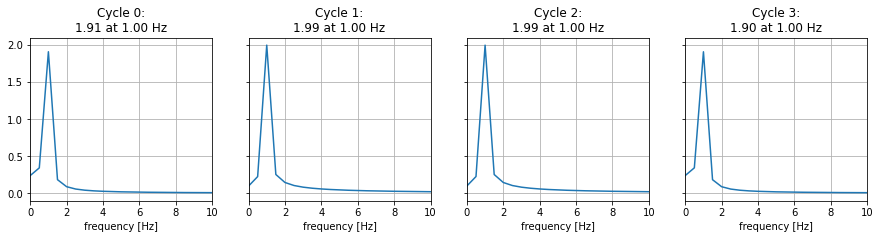

In [93]:
n_cycles_to_display = 4
fft_display = fft_cycles[:n_cycles_to_display]

fig, ax = plt.subplots(ncols=len(fft_display), figsize=(15, 3), sharex=True, sharey=True)
for i, ax, res in zip(range(n_cycles_to_display), ax, fft_display):
    res_abs = np.abs(res)
    ax.plot(f_k, res_abs)
    ax.grid(True)
    ax.set_xlim([0, 10])
    ax.set_xlabel("frequency [Hz]")
    
    k = np.argmax(res_abs)
    mag_max = res_abs[k]
    freq_max = f_k[k]
    
    ax.set_title("Cycle %d:\n%.2f at %.2f Hz" % (i, mag_max, freq_max))

As an example, the FFT amplitude spectrums of the first four cycles are shown above. In all four cycles, there is one peak at 1Hz. Therefore, we observe the same behaviour in different cycles. This means that the phase shift is not visible in the FFTs. Now let's look at all cycles and extract the frequency with maximum amplitude.

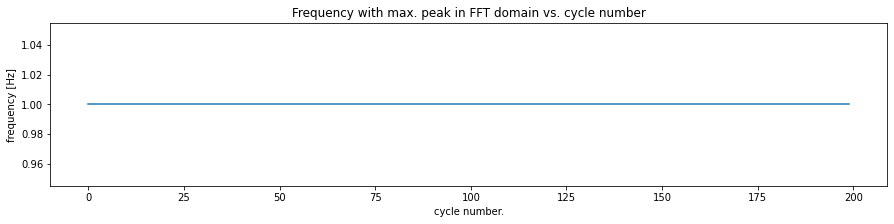

In [94]:
freq_list = list()
for res in fft_cycles:
    res_abs = np.abs(res)
    k = np.argmax(res_abs)
    freq_list.append(f_k[k])
    
plt.figure(figsize=(15,3))
plt.plot(freq_list)
plt.xlabel("cycle number.")
plt.ylabel("frequency [Hz]")
plt.title("Frequency with max. peak in FFT domain vs. cycle number");

So all the cycles have the same frequency in their peaks. but what about the real and imaginary parts and hence the phases of these peaks. let's look at them now.

In [95]:
cycle_max_list = list()

for res in fft_cycles:
    # calc. the magnitudes
    res_abs = np.abs(res)
    
    # find frequency index
    k = np.argmax(res_abs)
    cycle_max_list.append(res[k])

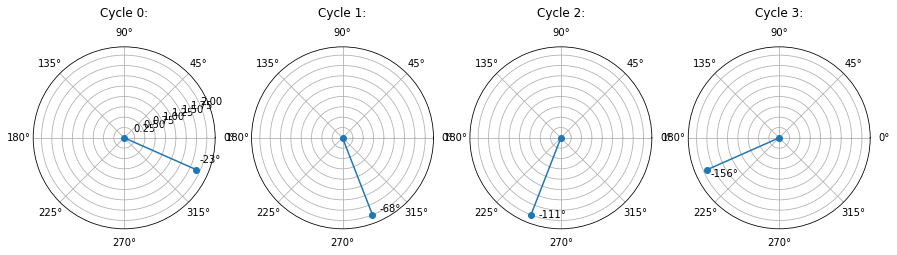

In [96]:
n_cycles_to_display = 4
cycle_max_list_display = cycle_max_list[:n_cycles_to_display]

fig, ax = plt.subplots(ncols=len(cycle_max_list_display), figsize=(15, 30), 
                       subplot_kw={'projection': "polar"}, sharey=True)

for i, ax, res in zip(range(n_cycles_to_display), ax, cycle_max_list_display):
    ax.plot([0, np.angle(res)], [0, np.abs(res)], marker="o")
    ax.text(np.angle(res)+0.1, np.abs(res), "%d°" % int(np.angle(res, deg=True)))
    ax.set_ylim([0, 2.2])
    ax.set_title("Cycle %d:\n" % (i, ))

We see that the angle between cycles changes with $-180^\circ$. Therefore we can find the angular velocity as follows: 
$-180^\circ = T_{cycle}v \Rightarrow -180^\circ = 2v \Rightarrow v = -\frac{\pi}{2}$.

We can also find the angular velocity using phase differences between cycles. We first find the phase differences between different cycles.

In [97]:
angle_diff = np.diff(np.angle(cycle_max_list, deg=True))

Then we divide these phase differences over cycle period to find the angular velocities. 

In [98]:
angle_vel = angle_diff/T_cycle
print(angle_vel[:10])

[-22.46250089 -21.22245965 -22.47788154 156.16284207 -22.46250089
 -21.22245965 -22.47788154 -23.83715793 -22.46250089 -21.22245965]


remove the phase wrapping effects.

In [99]:
angle_vel[angle_vel>0] -= 180
print("Angle velocities:", angle_vel[:10])

Angle velocities: [-22.46250089 -21.22245965 -22.47788154 -23.83715793 -22.46250089
 -21.22245965 -22.47788154 -23.83715793 -22.46250089 -21.22245965]


So we have found the angular velocity that was present in our signal which was $- \frac{\pi}{2}$.

In [102]:
v = -np.pi/2*180/(np.pi)
print(v)

-90.0


Now plot all these angular velocities:

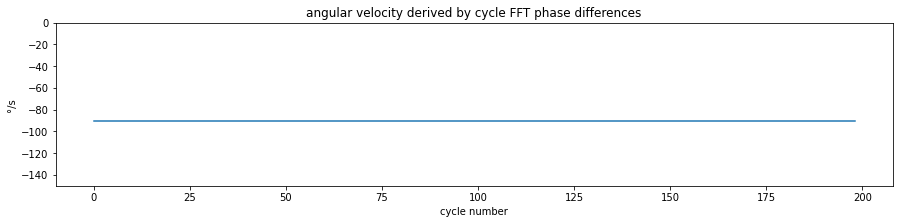

In [74]:
plt.figure(figsize=(15,3))
plt.plot(angle_vel)
plt.xlabel("cycle number")
plt.ylabel("°/s")
plt.title("angular velocity derived by cycle FFT phase differences")
plt.ylim([-150, 0]);

**Finding anuglar velocity using a second FFT**

After finding the frequencies with max magnitude at each cycle, we can run another FFT over these frequencies. But for the second FFT, the sampling frequency is $f_\text{cycle}$, the sampling period is $T_\text{cycle}$ and the number of samples is $n_\text{cycles}$.

In [103]:
f_cycle = 1/T_cycle

In [79]:
cycle_max_list[:5]

[(0.0019999999999999337-1.4551288138699516j),
 (-0.0019999999994330256+1.455128813869539j),
 (0.0020000000017165107-1.4551288138712006j),
 (-0.002000000001716146+1.4551288138712006j),
 (0.0019999999971479173-1.4551288138678775j)]

We apply the FFT over the frequencies with max magnitude, and like the first FFT, only take the positive side.

In [104]:
# here, we take only the positive side of fft
second_fft = fft(cycle_max_list)[:n_cycles//2]

In [81]:
second_fft[:5]

array([ 6.06700454e-13-4.07673895e-13j,  6.54901302e-11-1.49316909e-10j,
        1.09146422e-10+1.73073301e-11j, -4.09794365e-11-1.88182765e-11j,
        1.23424666e-10-8.96305252e-11j])

In [105]:
# frequency vector and angular velocity vector for the second FFT
freq_second = np.arange(0, n_cycles//2)*f_cycle/n_cycles
omega_second = 360*freq_second

In [83]:
omega_second

array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
        9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. , 18.9,
       19.8, 20.7, 21.6, 22.5, 23.4, 24.3, 25.2, 26.1, 27. , 27.9, 28.8,
       29.7, 30.6, 31.5, 32.4, 33.3, 34.2, 35.1, 36. , 36.9, 37.8, 38.7,
       39.6, 40.5, 41.4, 42.3, 43.2, 44.1, 45. , 45.9, 46.8, 47.7, 48.6,
       49.5, 50.4, 51.3, 52.2, 53.1, 54. , 54.9, 55.8, 56.7, 57.6, 58.5,
       59.4, 60.3, 61.2, 62.1, 63. , 63.9, 64.8, 65.7, 66.6, 67.5, 68.4,
       69.3, 70.2, 71.1, 72. , 72.9, 73.8, 74.7, 75.6, 76.5, 77.4, 78.3,
       79.2, 80.1, 81. , 81.9, 82.8, 83.7, 84.6, 85.5, 86.4, 87.3, 88.2,
       89.1])

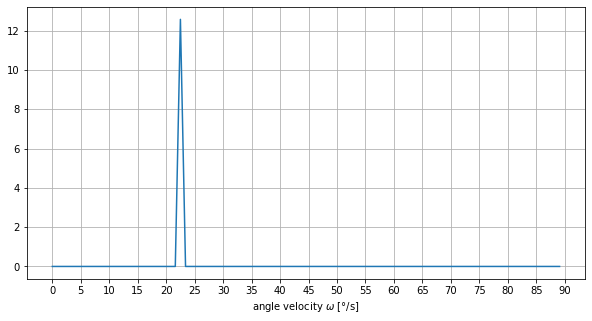

In [106]:
plt.figure(figsize=(10,5))
plt.plot(omega_second, np.abs(second_fft))
plt.grid()
plt.xlabel("angle velocity $\omega$ [°/s]")
plt.xticks(range(0, 95, 5));

The max magnitude happens at $v \approx 90^{\circ}$.

**References**

*   [DFT tutorial](https://www.robots.ox.ac.uk/~sjrob/Teaching/SP/l7.pdf)
*   [Numpy linspace documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html?highlight=linspace#numpy.linspace)
*   [Interpreting FFT results - obtaining magnitude and phase information](https://www.gaussianwaves.com/2015/11/interpreting-fft-results-obtaining-magnitude-and-phase-information/)
*   [Numpy FFT documentation](https://numpy.org/doc/stable/reference/routines.fft.html#module-numpy.fft)